In [1]:
%matplotlib inline
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

import timeit
#start_time = timeit.default_timer()
# code you want to evaluate
#elapsed = timeit.default_timer() - start_time
print ("libraries loaded")

libraries loaded


In [2]:
#set FIXED variables
HOMEPATH = "/home/ubuntu/fastai/"
TRAINPATH = HOMEPATH + "dogscats/train/"
VALIDPATH = HOMEPATH + "dogscats/valid/"


In [3]:
os.chdir(HOMEPATH)
print (os.getcwd())

/home/ubuntu/fastai


In [4]:
import utils; reload(utils)
from utils import plots

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)
Using TensorFlow backend.


In [5]:
batch_size=64

In [6]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [7]:
print ("instantiating Vgg16")
vgg = Vgg16()
print ("done")

instantiating Vgg16
done


requires files downloaded and unzipped from fast.ai before executing.  
cd /home/ubuntu/fastai/
wget http://files.fast.ai/data/dogscats.zip  
unzip dogscats.zip  


In [8]:
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(TRAINPATH, batch_size=batch_size)
val_batches = vgg.get_batches(VALIDPATH, batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 505s - loss: 0.4250 - acc: 0.8703 - val_loss: 0.2207 - val_acc: 0.9180


reinitialise vgg object with small batch size for quick analysis and testing.

In [14]:
vgg = Vgg16()

In [15]:
batches = vgg.get_batches(TRAINPATH, batch_size=4)

Found 23000 images belonging to 2 classes.


In [16]:
imgs,labels = next(batches)

In [17]:
print (type(imgs), imgs.shape)
print (type(labels), labels.shape)

<type 'numpy.ndarray'> (4, 3, 224, 224)
<type 'numpy.ndarray'> (4, 2)


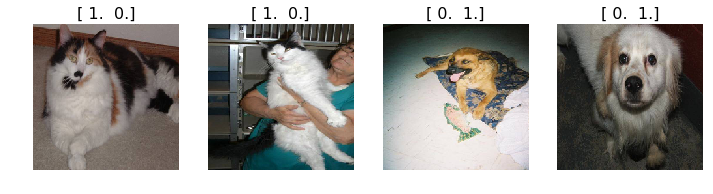

In [18]:
plots(imgs, titles=labels)

In [19]:
vgg.predict(imgs, True)

(array([ 0.2062,  0.6579,  0.5859,  0.3434], dtype=float32),
 array([361, 332,  33, 382]),
 [u'skunk', u'Angora', u'loggerhead', u'squirrel_monkey'])

above result is predict with _NO_ finetuning. ie: skipped the vgg.finetune(batches) step.  
resulting prediction is using the imagenet dataset the Vgg16 model was trained on.  
reload the training and validation dataset, finetune then predict.

In [23]:
batch_size=64

In [24]:
batches = vgg.get_batches(TRAINPATH, batch_size=batch_size)
val_batches = vgg.get_batches(VALIDPATH, batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [25]:
vgg.finetune(batches)

In [26]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 482s - loss: 0.4304 - acc: 0.8698 - val_loss: 0.2057 - val_acc: 0.9235
